# ML Group Work Project 2 24/05 632 MACHINE LEARNING IN FINANCE

Group no. : 6200
members:


*   Boyan Davidov

*   Ivan Shigolakov

*   Bharat Swami





## Neural Networks

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import sklearn
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
carbon_data = pd.read_csv('/content/carbon_data_df_daily.csv', delimiter = ',' )

In [31]:
carbon_data = carbon_data.set_index('Date')
carbon_data.index = pd.to_datetime(carbon_data.index, format='%d/%m/%Y')
carbon_data = carbon_data.sort_index()

In [32]:
carbon_data = carbon_data[carbon_data.index >= '2008-01-01']

In [33]:
carbon_data.head()

Carbon Price  Vol.        Oil  Coal Price    Gas          DAX
Date                                                                     
2008-01-02         22.92  2.78  99.620003      127.75  7.850  7949.109863
2008-01-03         23.54  3.31  99.180000      127.55  7.674  7908.410156
2008-01-04         23.55  3.82  97.910004      129.00  7.841  7808.689941
2008-01-07         23.66  4.15  95.089996      131.75  7.879  7817.169922
2008-01-08         23.70  2.69  96.330002      130.75  7.967  7849.990234

In [34]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(carbon_data)

In [35]:
column_names = carbon_data.columns.tolist()

In [36]:
df_scaled = pd.DataFrame(scaled_data, columns=column_names, index=carbon_data.index)

In [37]:
df_scaled.tail()

Carbon Price      Vol.       Oil  Coal Price       Gas       DAX
Date                                                                        
2023-08-11      0.882384  0.139080  0.660507    0.194857  0.106490  0.950202
2023-08-14      0.894450  0.168574  0.656790    0.192610  0.108557  0.955832
2023-08-16      0.901060  0.198322  0.639679    0.193234  0.091773  0.946865
2023-08-17      0.903893  0.200864  0.645200    0.193609  0.094171  0.938075
2023-08-18      0.895499  0.163488  0.649902    0.195481  0.088384  0.930058

In [38]:
# % change for just the target column
df_scaled["Carbon Price"] = df_scaled["Carbon Price"].pct_change()

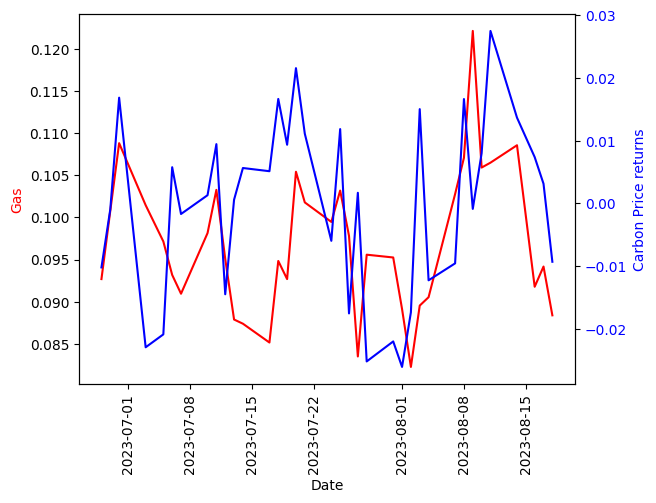

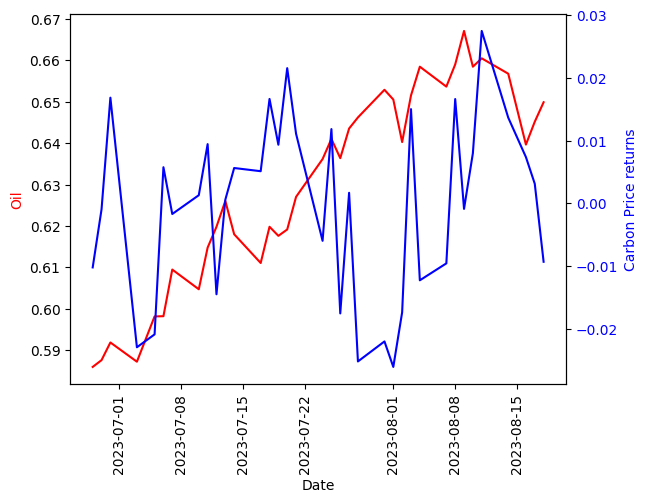

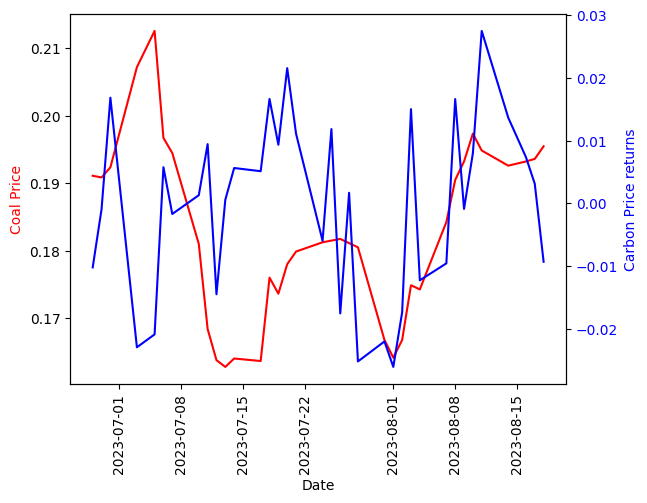

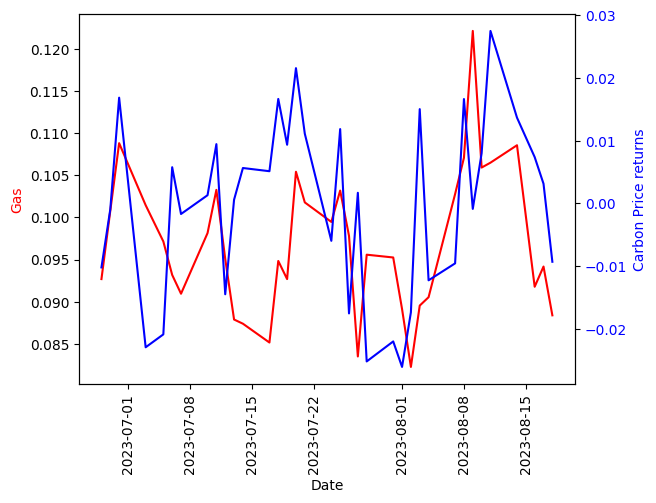

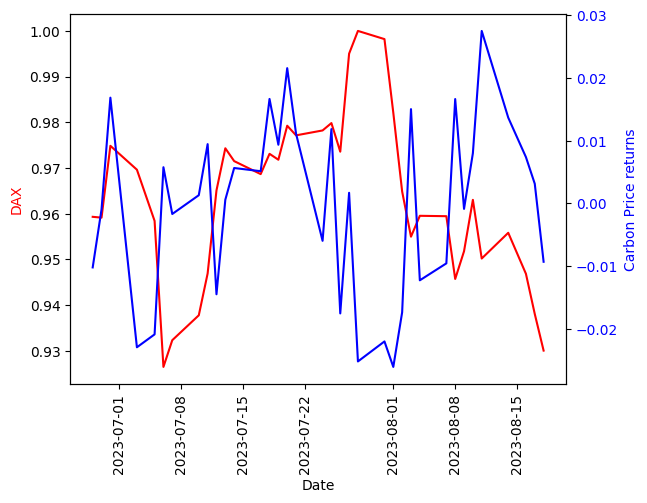

In [39]:
target = "Carbon Price"
n_pts = 36
series = ['Gas','Oil','Coal Price','Gas','DAX']  # our features, eg. input layer

for j in np.arange(len(series)):
    var = series[j]
    df2plot = df_scaled.iloc[-n_pts:]  # Select the last n_pts rows
    x = df2plot.index
    data_1 = df2plot[var]
    data_2 = df2plot[target]

    # Create Plot
    fig, ax1 = plt.subplots()

    ax1.set_xlabel("Date")
    ax1.set_ylabel(var, color="red")
    ax1.plot(x, data_1, color="red")
    plt.xticks(rotation=90)  # Rotates X-Axis Ticks by 90 degrees

    # Adding Twin Axes for the target
    ax2 = ax1.twinx()
    ax2.plot(x, data_2, color="blue")

    # Add label for the second y-axis
    ax2.set_ylabel(f"{target} returns", color="blue")
    ax2.tick_params(axis='y', labelcolor="blue")

    # Show plot
    plt.show()

In [40]:
# Begin creating our model by importing TensorFlow
import tensorflow as tf

print(tf.__version__)

2.15.0


In [41]:
X = df_scaled[series].values
y = df_scaled["Carbon Price"].values

In [42]:
test_sz = 0.3
train_sz = int((1 - test_sz) * len(X))
X_train = X[:train_sz]
y_train = y[:train_sz]
X_test = X[train_sz:]
y_test = y[train_sz:]
len(X_train), len(X_test)

(2689, 1153)

In [43]:
# Build the model
# tf.keras: The Keras API integrated into TensorFlow 2

tf.random.set_seed(42)  # first we set random seed
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])  # The output layer

# We compile the model specifying loss, and optimizer.
model.compile(
    loss=tf.keras.losses.mse,  # Los function is MAE, mean absolute error.
    optimizer=tf.keras.optimizers.SGD(
        learning_rate=0.5, momentum=0.4
    ),  # stochastic Gradient descent Optimizer
    metrics=["mse"],
)  # performance metric is MAE

model.fit(X_train, y_train, epochs=30, batch_size=8)  # epoch and batch size specified

Epoch 1/30
337/337 [==============================] - 1s 2ms/step - loss: nan - mse: nan
Epoch 2/30
337/337 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 3/30
337/337 [==============================] - 1s 2ms/step - loss: nan - mse: nan
Epoch 4/30
337/337 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 5/30
337/337 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 6/30
337/337 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 7/30
337/337 [==============================] - 1s 1ms/step - loss: nan - mse: nan
Epoch 8/30
337/337 [==============================] - 1s 1ms/step - loss: nan - mse: nan
Epoch 9/30
337/337 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 10/30
337/337 [==============================] - 0s 1ms/step - loss: nan - mse: nan
Epoch 11/30
337/337 [==============================] - 1s 2ms/step - loss: nan - mse: nan
Epoch 12/30
337/337

In [44]:
# Improve our model. More epochs, added extra layers

tf.random.set_seed(42)
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(
            8, activation="sigmoid", input_shape=(X_train.shape[1],)
        ),  # added extra layer
        tf.keras.layers.Dense(4, activation="sigmoid"),  # added extra layer
        tf.keras.layers.Dense(1),
    ]
)
model_1.compile(
    loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"]
)
model_1.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

In [45]:
import tensorflow as tf

preds = model_1.predict(X_test)

# Initialize the Mean Squared Error loss object
mse = tf.keras.losses.MeanSquaredError()

# Calculate Mean Squared Error by passing the true and predicted values
mse_value = mse(y_true=y_test, y_pred=preds.squeeze()).numpy()

print("Mean Squared Error:", mse_value)


37/37 [==============================] - 0s 1ms/step
Mean Squared Error: nan


## LDA

In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix



#### Load the Iris dataset

In [47]:
iris = load_iris()
X = iris.data
y = iris.target


#### Split the dataset into training and testing sets

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Standardize the features (optional but recommended for LDA)

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Create the LDA model

In [50]:

lda = LDA()

#### Fit the LDA model to the training data

In [51]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

#### Predict the classes of the test set

In [52]:
y_pred = lda.predict(X_test)

#### Evaluate the performance

In [53]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## SVM

#### *Computation:*

For the computation purposes we will use the dataset which provides insights into factors influencing hiring decisions (Kaggle). The goal is to classify/predict wheather a record (candidate) will be hired or not.

In [54]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [55]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [56]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Standardize the features (optional but recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Checking the shapes
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [59]:
# Create the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

In [60]:
# Fit the SVM model to the training data
svm_model.fit(X_train, y_train)

# Predict the classes of the test set
y_pred = svm_model.predict(X_test)

In [61]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.98
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



#### *Illustration:*

"Support Vector Machine (SVM) Algorithm". Geeksforgeeks. 10 June, 2023, https://www.geeksforgeeks.org/support-vector-machine-algorithm/

In [62]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

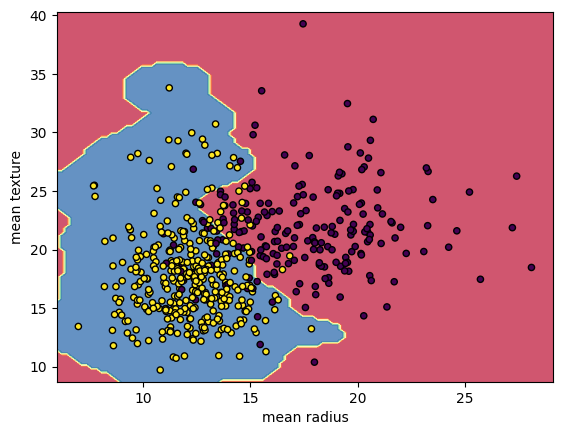

In [63]:
# Load the important packages
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

# Load the datasets
cancer = load_breast_cancer()
X = cancer.data[:, :2]
y = cancer.target

#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X, y)

# Plot Decision Boundary
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )

# Scatter plot
plt.scatter(X[:, 0], X[:, 1],
            c=y,
            s=20, edgecolors="k")
plt.show()

In searching the optimal hyperparameters we will use grid search algorithm

In [64]:
# Importing the library
from sklearn.model_selection import GridSearchCV

In [65]:
# Creating the sets of hyperparameters
param_grid = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["linear", "poly", "rbf", "sigmoid"]
}

In [66]:
# Grid Search model
grid = GridSearchCV(
    SVC(), param_grid, refit = True, verbose = 3
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.952 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.905 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.952 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.952 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=1.000 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.905 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.952 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [67]:
# Colab2PDF v1.0.4 by Drengskapur (github.com/drengskapur/colab2pdf) (License: GPL-3.0-or-later)
# @title {display-mode:"form"}
# @markdown ⬇️ Download PDF
def colab2pdf():
    ENABLE=True # @param {type:"boolean"}
    if ENABLE:
        !apt-get install librsvg2-bin
        import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
        locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
        NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
        TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
        NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=600)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
        warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
        with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
        if not pathlib.Path("/usr/local/bin/quarto").exists():
            !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
        with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
        !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
        google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  librsvg2-bin
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,871 kB of archives.
After this operation, 6,019 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 librsvg2-bin amd64 2.52.5+dfsg-3ubuntu0.2 [1,871 kB]
Fetched 1,871 kB in 0s (11.3 MB/s)
Selecting previously unselected package librsvg2-bin.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../librsvg2-bin_2.52.5+dfsg-3ubuntu0.2_amd64.deb ...
Unpacking librsvg2-bin (2.52.5+dfsg-3ubuntu0.2) ...
Setting up librsvg2-bin (2.52.5+dfsg-3ubuntu0.2) ...
Processing triggers for man-db (2.10.2-1) ...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>